In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import matplotlib.ticker as mtick
# %matplotlib in line

In [2]:
# Load the dataset
customer_data=pd.read_csv("C:/Users/sobha/Downloads/Customer Churn.csv")

In [3]:
# Viewing a sample of data
customer_data.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6042,4750-UKWJK,Female,1,Yes,No,37,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.60,727.8,No
2390,1226-JZNKR,Female,0,Yes,Yes,8,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,19.80,160.05,No
5599,2344-JMOGN,Male,0,Yes,No,9,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Month-to-month,Yes,Mailed check,94.85,890.6,Yes
6304,2754-XBHTB,Female,0,No,No,9,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),77.65,714.15,Yes
791,3442-ZHHCC,Male,0,No,No,68,Yes,Yes,DSL,Yes,...,Yes,No,No,Yes,One year,Yes,Credit card (automatic),76.90,5023,No


In [4]:
# Knowing the size of the data
customer_data.shape

(7043, 21)

In [5]:
# Viewing names of columns and data types of them

print(customer_data.columns)
customer_data.info()

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   obj

In [6]:
# Mathematically viewing data

customer_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


SeniorCitizen is categorial hence not required

50% of the customers have tenure less than 29 months whereas average monthlt charges are 64.76 but 25% pay more than 89.85 per month

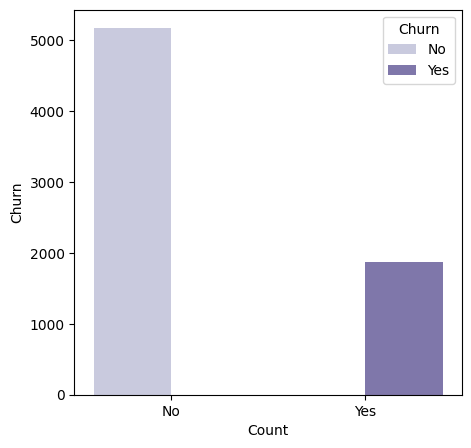

In [7]:
plt.figure(figsize=(5, 5))
sns.countplot(x='Churn', data=customer_data, palette="Purples", hue="Churn")
plt.xlabel("Count")
plt.ylabel("Churn")
plt.show()

In [8]:
customer_data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [9]:
customer_data['Churn'].value_counts()*100/len(customer_data['Churn'])

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

+ Data is divided in ratio of 73.5:26.5
+ Data is imbalanced

In [10]:
customer_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

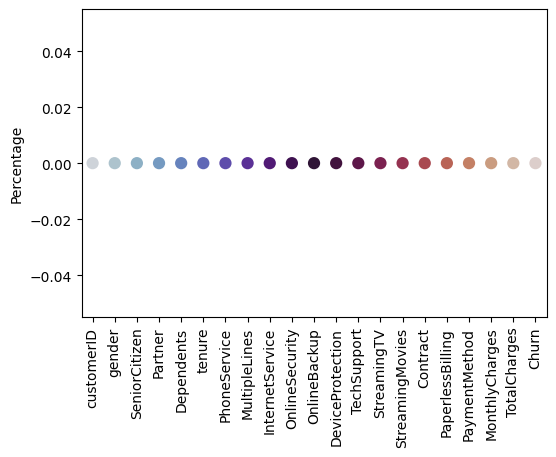

In [11]:
missing_data=pd.DataFrame(customer_data.isnull().sum()*100/customer_data.shape[0])
plt.figure(figsize=(6,4))
sns.pointplot(x=missing_data.index, y=0, data=missing_data, palette="twilight")
plt.xticks(rotation=90)
plt.title=("Percentage of Missing Values")
plt.ylabel("Percentage")
plt.show()

## Data Cleaning

In [12]:
customer_data["TotalCharges"]=pd.to_numeric(customer_data["TotalCharges"], errors='coerce')
customer_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
customer_data.loc[customer_data ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Since the percentage of missing record is very low, it is safe to drop those rows

In [14]:
# Removing missing value
customer_data.dropna(how='any', inplace=True)
customer_data.shape

(7032, 21)

In [15]:
customer_data['tenure'].max() #72

72

In [16]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]
customer_data['tenure_group'] = pd.cut(customer_data.tenure, range(1, 80, 12), right=False, labels=labels)

In [17]:
customer_data["tenure_group"].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

In [18]:
# dropping columns CustomerID and tenure
customer_data.drop(columns=["customerID"], inplace=True)

In [19]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   object  
 1   SeniorCitizen     7032 non-null   int64   
 2   Partner           7032 non-null   object  
 3   Dependents        7032 non-null   object  
 4   tenure            7032 non-null   int64   
 5   PhoneService      7032 non-null   object  
 6   MultipleLines     7032 non-null   object  
 7   InternetService   7032 non-null   object  
 8   OnlineSecurity    7032 non-null   object  
 9   OnlineBackup      7032 non-null   object  
 10  DeviceProtection  7032 non-null   object  
 11  TechSupport       7032 non-null   object  
 12  StreamingTV       7032 non-null   object  
 13  StreamingMovies   7032 non-null   object  
 14  Contract          7032 non-null   object  
 15  PaperlessBilling  7032 non-null   object  
 16  PaymentMethod     7032 non-nu

## Exploratory Data Analysis

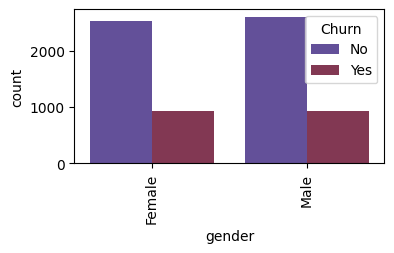

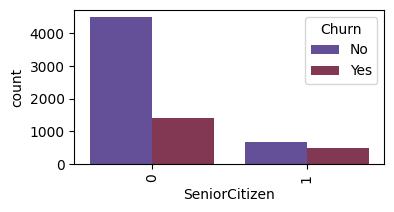

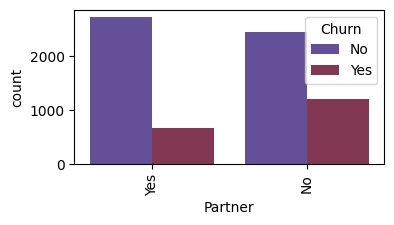

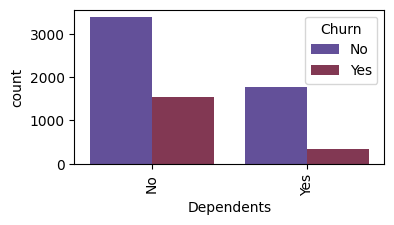

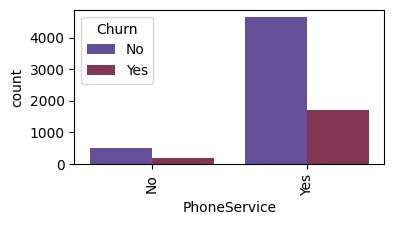

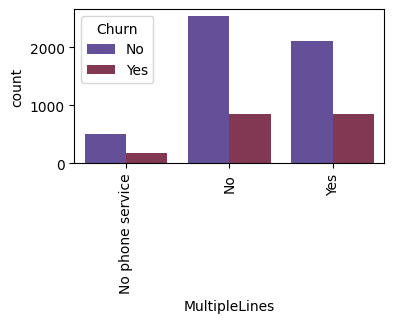

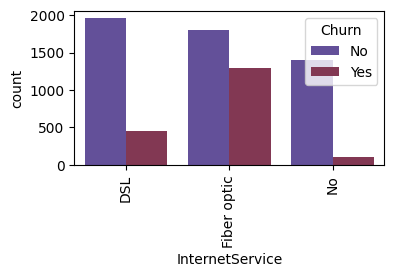

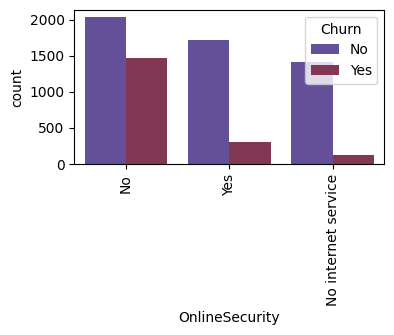

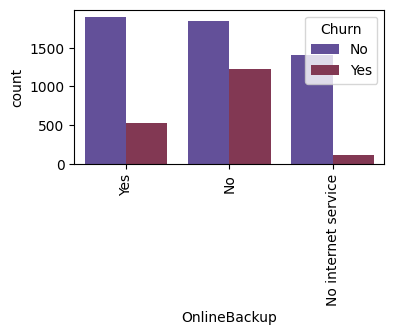

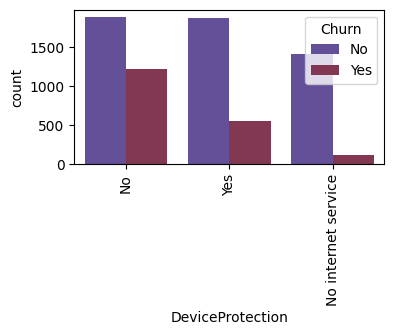

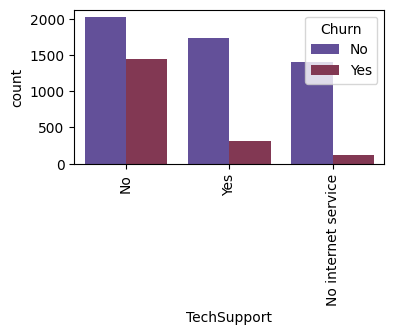

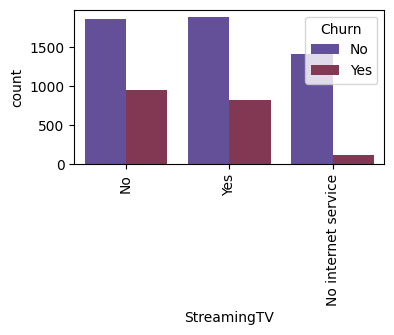

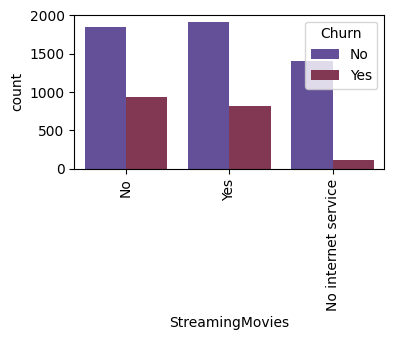

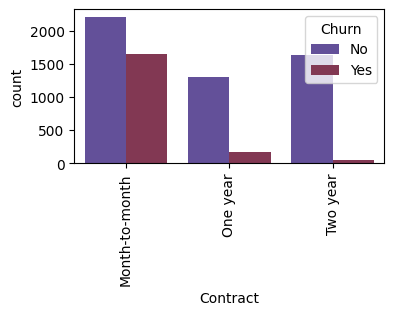

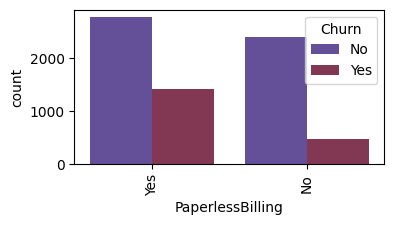

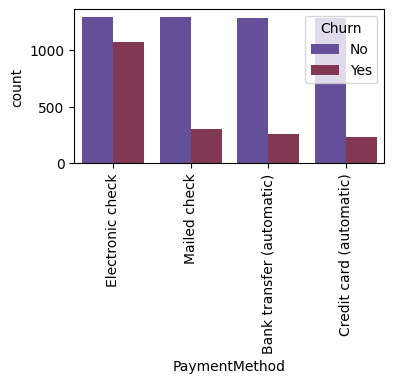

C:\Users\sobha\pp\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\sobha\pp\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


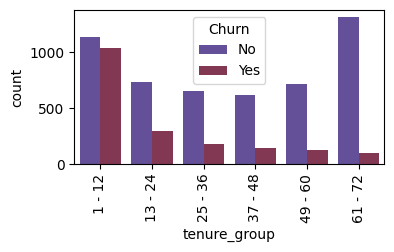

In [20]:
copy_data=customer_data.copy()

for i, p in enumerate(copy_data.drop(columns=["Churn", "TotalCharges", "MonthlyCharges", "tenure"])):
    plt.figure(i, figsize=(4, 2))
    sns.countplot(x=p, data=customer_data, palette="twilight", hue="Churn")
    plt.xticks(rotation=90)
    plt.show()

In [21]:
for i in ["Churn", 'Partner', "Dependents", "PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling"]:
    customer_data[i] = customer_data[i].apply(lambda x: 1 if x == 'Yes' else 0)

customer_data["gender_female"] = customer_data["gender"].apply(lambda x: 1 if x == 'Female' else 0)
customer_data.drop(columns=["gender"], inplace=True)

In [22]:
customer_data

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,gender_female
0,0,1,0,1,0,0,DSL,0,1,0,...,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1 - 12,1
1,0,0,0,34,1,0,DSL,1,0,1,...,0,0,One year,0,Mailed check,56.95,1889.50,0,25 - 36,0
2,0,0,0,2,1,0,DSL,1,1,0,...,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1 - 12,0
3,0,0,0,45,0,0,DSL,1,0,1,...,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,37 - 48,0
4,0,0,0,2,1,0,Fiber optic,0,0,0,...,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1 - 12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,DSL,1,0,1,...,1,1,One year,1,Mailed check,84.80,1990.50,0,13 - 24,0
7039,0,1,1,72,1,1,Fiber optic,0,1,1,...,1,1,One year,1,Credit card (automatic),103.20,7362.90,0,61 - 72,1
7040,0,1,1,11,0,0,DSL,1,0,0,...,0,0,Month-to-month,1,Electronic check,29.60,346.45,0,1 - 12,1
7041,1,1,0,4,1,1,Fiber optic,0,0,0,...,0,0,Month-to-month,1,Mailed check,74.40,306.60,1,1 - 12,0


In [23]:
for i in ["Churn", 'Partner', "Dependents", "PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling"]:
    print(customer_data[i].value_counts())
    print()

Churn
0    5163
1    1869
Name: count, dtype: int64

Partner
0    3639
1    3393
Name: count, dtype: int64

Dependents
0    4933
1    2099
Name: count, dtype: int64

PhoneService
1    6352
0     680
Name: count, dtype: int64

MultipleLines
0    4065
1    2967
Name: count, dtype: int64

OnlineSecurity
0    5017
1    2015
Name: count, dtype: int64

OnlineBackup
0    4607
1    2425
Name: count, dtype: int64

DeviceProtection
0    4614
1    2418
Name: count, dtype: int64

TechSupport
0    4992
1    2040
Name: count, dtype: int64

StreamingTV
0    4329
1    2703
Name: count, dtype: int64

StreamingMovies
0    4301
1    2731
Name: count, dtype: int64

PaperlessBilling
1    4168
0    2864
Name: count, dtype: int64



In [24]:
customer_data.sample(5)


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,gender_female
1411,1,0,0,29,1,0,Fiber optic,0,1,1,...,1,1,Month-to-month,1,Bank transfer (automatic),101.45,2948.60,0,25 - 36,0
3851,0,1,1,46,1,0,No,0,0,0,...,0,0,Two year,1,Mailed check,19.25,864.20,0,37 - 48,1
1143,0,1,0,18,1,1,DSL,0,1,0,...,0,0,Month-to-month,0,Credit card (automatic),56.80,1074.65,0,13 - 24,0
281,0,0,0,10,1,0,DSL,0,1,0,...,0,0,Month-to-month,0,Electronic check,51.20,498.25,0,1 - 12,1
172,0,1,0,14,1,0,DSL,0,1,1,...,1,1,Two year,0,Mailed check,81.95,1181.75,0,13 - 24,0


In [25]:
# Converting categorical variables into numerical ones
customer_data_dummies = pd.get_dummies(customer_data, dtype=int)
customer_data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   Partner                                  7032 non-null   int64  
 2   Dependents                               7032 non-null   int64  
 3   tenure                                   7032 non-null   int64  
 4   PhoneService                             7032 non-null   int64  
 5   MultipleLines                            7032 non-null   int64  
 6   OnlineSecurity                           7032 non-null   int64  
 7   OnlineBackup                             7032 non-null   int64  
 8   DeviceProtection                         7032 non-null   int64  
 9   TechSupport                              7032 non-null   int64  
 10  StreamingTV                              7032 non-nul

C:\Users\sobha\pp\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sobha\pp\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


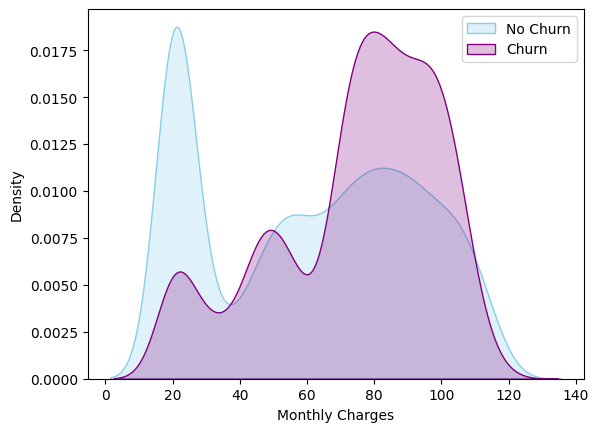

In [26]:
sns.kdeplot(customer_data_dummies.MonthlyCharges[(customer_data_dummies["Churn"] == 0) ],
                color="skyblue", fill = True)
sns.kdeplot(customer_data_dummies.MonthlyCharges[(customer_data_dummies["Churn"] == 1) ],
                color="purple", fill= True)
plt.legend(["No Churn","Churn"],loc='upper right')
plt.ylabel('Density')
plt.xlabel('Monthly Charges')
plt.show()

C:\Users\sobha\pp\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sobha\pp\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


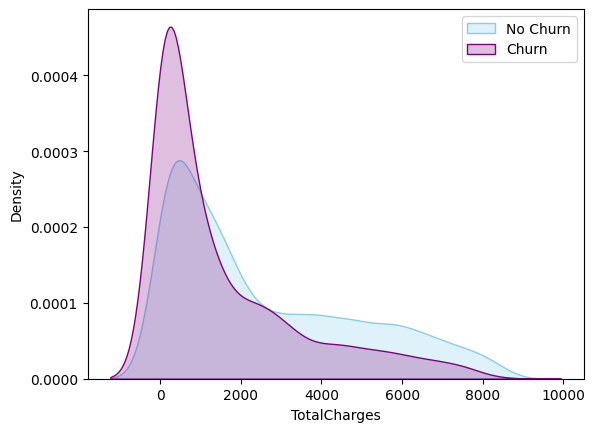

In [27]:
sns.kdeplot(customer_data_dummies.TotalCharges[(customer_data_dummies["Churn"] == 0) ],
                color="skyblue", fill = True)
sns.kdeplot(customer_data_dummies.TotalCharges[(customer_data_dummies["Churn"] == 1) ],
                color="purple", fill= True)
plt.legend(["No Churn","Churn"],loc='upper right')
plt.ylabel('Density')
plt.xlabel('TotalCharges')
plt.show()

#### Insights:
+  Higher Monthly Charge, Lower tenure and Lower Total Charge are linkd to High Churn.

In [28]:
customer_data_dummies.corr()["Churn"]

SeniorCitizen                              0.150541
Partner                                   -0.149982
Dependents                                -0.163128
tenure                                    -0.354049
PhoneService                               0.011691
MultipleLines                              0.040033
OnlineSecurity                            -0.171270
OnlineBackup                              -0.082307
DeviceProtection                          -0.066193
TechSupport                               -0.164716
StreamingTV                                0.063254
StreamingMovies                            0.060860
PaperlessBilling                           0.191454
MonthlyCharges                             0.192858
TotalCharges                              -0.199484
Churn                                      1.000000
gender_female                              0.008545
InternetService_DSL                       -0.124141
InternetService_Fiber optic                0.307463
InternetServ

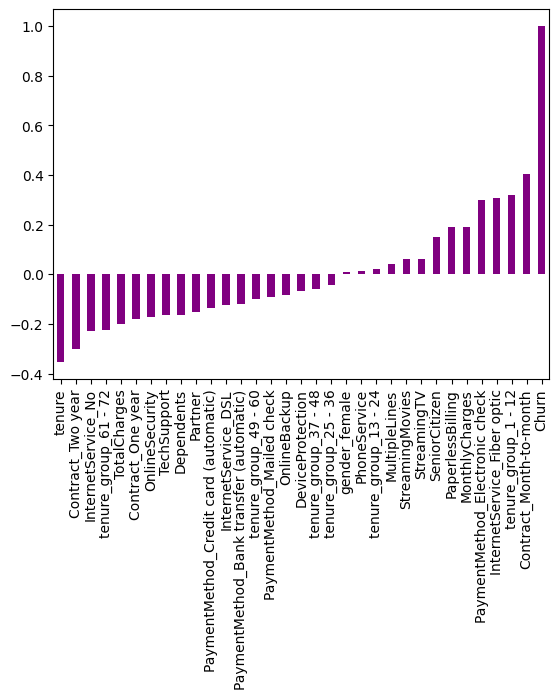

<Figure size 2000x400 with 0 Axes>

In [29]:
customer_data_dummies.corr()["Churn"].sort_values().plot(kind="bar", color="Purple")
plt.xticks(rotation=90)
plt.figure(figsize=(20,4))

plt.show()

### Insights:

+ HIGH Churn seen in case of Contract_Month-to-month, tenure_group_1 - 12, PaymentMethod_Electronic check, InternetService_Fiber optic and Contract_Two year

+ LOW Churn is seens in case of InternetService_No, tenure_group_61 - 72 and TotalCharges

+ Factors like Gender, Availability of PhoneService and that of multiple lines have alomost NO impact on Churn

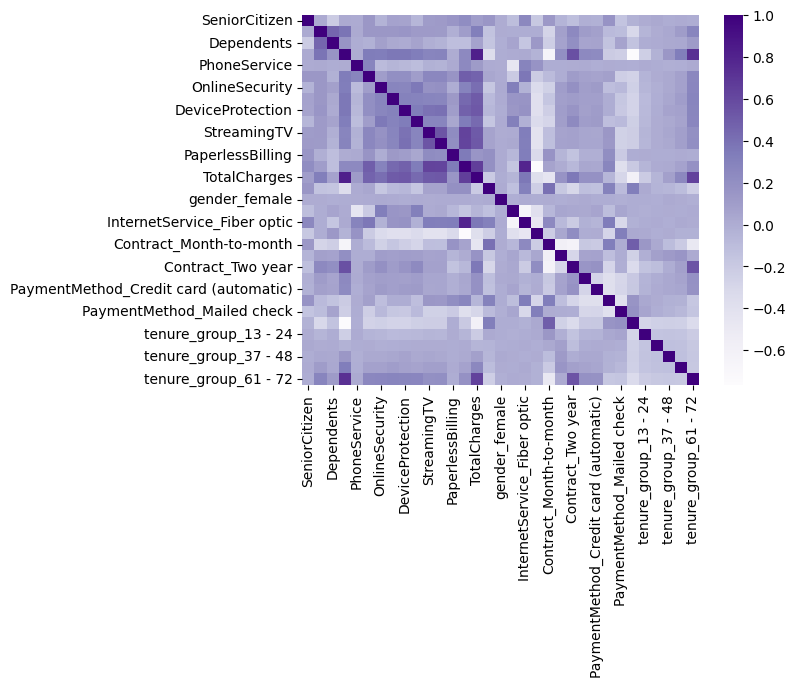

<Figure size 200x200 with 0 Axes>

In [58]:
sns.heatmap(customer_data_dummies.corr(), cmap="Purples")
plt.show()

## Bivariate Analysis

#### Relationship b|w MonthlyCharges and TotalCharges

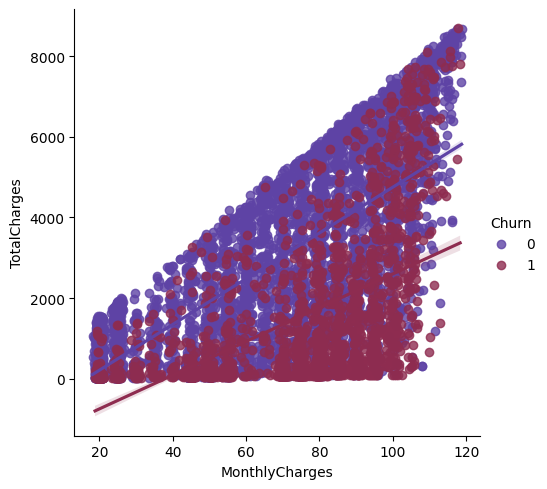

<Figure size 300x300 with 0 Axes>

In [56]:
sns.lmplot(data=customer_data_dummies, x='MonthlyCharges', y='TotalCharges', hue="Churn", palette="twilight")
plt.figure(i, figsize=(3, 3))
plt.show()

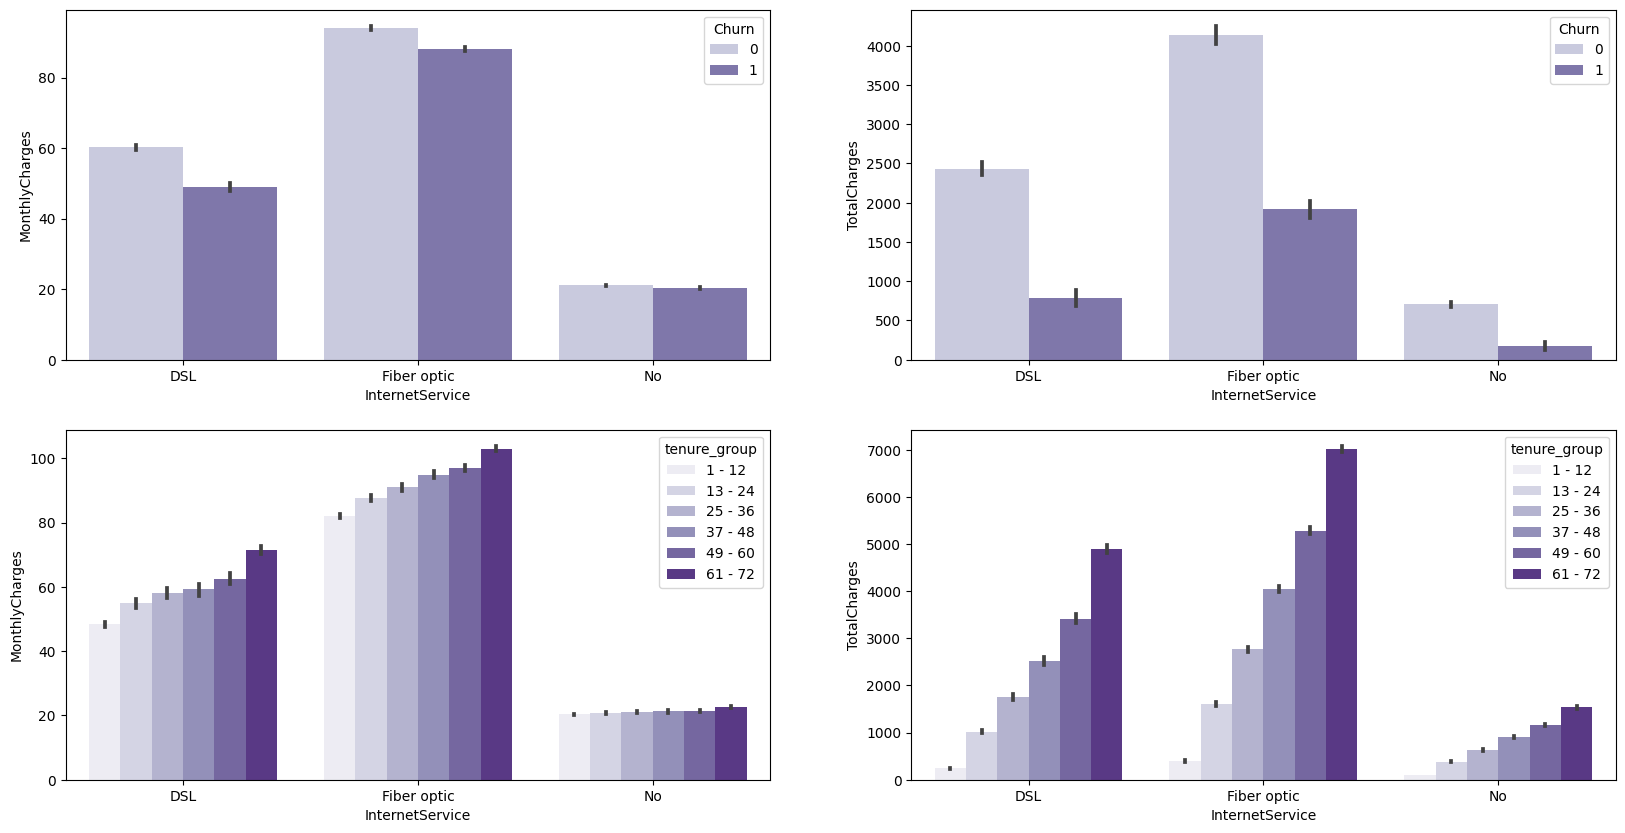

In [32]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
sns.barplot(y="MonthlyCharges", x="InternetService", data=customer_data, palette="Purples", hue="Churn")
plt.subplot(2, 2, 2)
sns.barplot(y="TotalCharges", x="InternetService", data=customer_data, palette="Purples", hue="Churn")
plt.subplot(2, 2, 3)
sns.barplot(y="MonthlyCharges", x="InternetService", data=customer_data, palette="Purples", hue="tenure_group")
plt.subplot(2, 2, 4)
sns.barplot(y="TotalCharges", x="InternetService", data=customer_data, palette="Purples", hue="tenure_group")
plt.show()

C:\Users\sobha\pp\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\sobha\pp\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\sobha\pp\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.

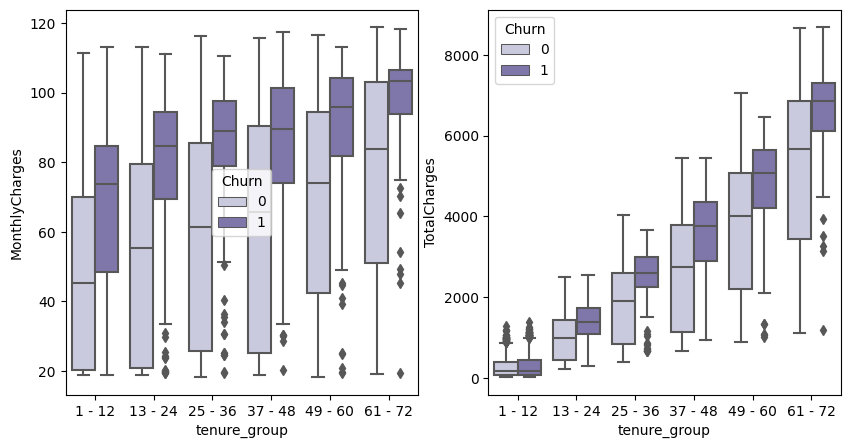

In [33]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y="MonthlyCharges", x="tenure_group", data=customer_data, palette="Purples", hue="Churn")

plt.subplot(1, 2, 2)
sns.boxplot(y="TotalCharges", x="tenure_group", data=customer_data, palette="Purples", hue="Churn")
plt.show()

C:\Users\sobha\AppData\Local\Temp\ipykernel_23400\1056349927.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_data[customer_data["Churn"]==0]["tenure"], color="pink")
C:\Users\sobha\pp\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sobha\AppData\Local\Temp\ipykernel_23400\1056349927.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a f

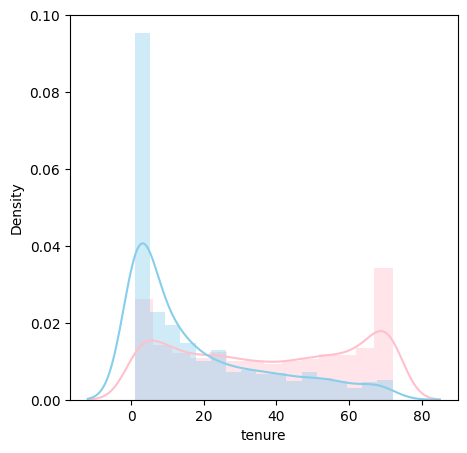

In [34]:
plt.figure(figsize=(5, 5))

sns.distplot(customer_data[customer_data["Churn"]==0]["tenure"], color="pink")
sns.distplot(customer_data[customer_data["Churn"]==1]["tenure"], color="skyblue")

plt.show()

# Model Training

In [35]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [36]:
x=customer_data_dummies.drop("Churn", axis=1)
x

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,1,0,1,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
1,0,0,0,34,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,0,0,2,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,0,0,45,0,0,1,0,1,1,...,1,0,0,0,0,0,0,1,0,0
4,0,0,0,2,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,1,0,1,1,...,0,0,0,1,0,1,0,0,0,0
7039,0,1,1,72,1,1,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
7040,0,1,1,11,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
7041,1,1,0,4,1,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


In [37]:
y=customer_data_dummies["Churn"]

### Train Test Split

In [38]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

### Linear Regression Model

In [39]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()

In [40]:
clf.fit(x_train, y_train)

C:\Users\sobha\pp\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
y_pred=clf.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8137882018479033

In [43]:
# from mlxtend.plotting import plot_decision_regions
# plot_decision_regions(np.array(x_train["MonthyCharges"]), np.array(y_train), clf, legend=2)

In [44]:
# plt.scatter(x_test, y_test, color='blue', label='Actual')
# plt.plot(x_test, y_pred, color='red', label='Predicted')

### Decision Tree Classifier

In [45]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [46]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [47]:
y_pred=model_dt.predict(x_test)
y_pred

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [48]:
model_dt.score(x_test,y_test)

0.7960199004975125

In [49]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1058
           1       0.59      0.56      0.58       349

    accuracy                           0.80      1407
   macro avg       0.73      0.72      0.72      1407
weighted avg       0.79      0.80      0.79      1407



As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.

Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.

Hence, moving ahead to call SMOTEENN (UpSampling + ENN)

In [50]:
import pickle

In [51]:
pickle.dump(clf, open('churn_pred_model.pkl', 'wb'))

In [52]:

load_model = pickle.load(open('churn_pred_model.pkl', 'rb'))

In [53]:
model_score = load_model.score(x_test, y_test)
model_score

0.8137882018479033